In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

READING DATA FROM DATASETS

In [38]:
ITEMS_DATAFRAME=pd.read_csv("C:/Users/i tharun chand/Desktop/project/items.csv")
ITEM_CATEGORIES_DATAFRAME=pd.read_csv("C:/Users/i tharun chand/Desktop/project/item_categories.csv")
SHOPS_DATAFRAME=pd.read_csv("C:/Users/i tharun chand/Desktop/project/shops.csv")
SALES_TRAIN_DATAFRAME=pd.read_csv("C:/Users/i tharun chand/Desktop/project/sales_train.csv")
TEST_DATAFRAME=pd.read_csv("C:/Users/i tharun chand/Desktop/project/test.csv")
TEST_DATAFRAME.head()


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


DATA SERIALIZATION

In [30]:
DATASET=[]
DATASET = SALES_TRAIN_DATAFRAME.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
DATASET.head()

item_cnt_day                              ...                 \
date_block_num            0   1  2  3  4  5  6  7  8  9   ... 24 25 26 27 28   
shop_id item_id                                           ...                  
0       30                 0  31  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        31                 0  11  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        32                 6  10  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        33                 3   3  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   
        35                 1  14  0  0  0  0  0  0  0  0  ...  0  0  0  0  0   

                                
date_block_num  29 30 31 32 33  
shop_id item_id                 
0       30       0  0  0  0  0  
        31       0  0  0  0  0  
        32       0  0  0  0  0  
        33       0  0  0  0  0  
        35       0  0  0  0  0  

[5 rows x 34 columns]

In [31]:
DATASET.reset_index(inplace = True)


In [32]:
DATASET = pd.merge(TEST_DATAFRAME,DATASET,on = ['item_id','shop_id'],how = 'left')
DATASET.head()

C:\Temp\ipykernel_19956\322924388.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  DATASET = pd.merge(TEST_DATAFRAME,DATASET,on = ['item_id','shop_id'],how = 'left')
C:\Temp\ipykernel_19956\322924388.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  DATASET = pd.merge(TEST_DATAFRAME,DATASET,on = ['item_id','shop_id'],how = 'left')


,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
DATASET.fillna(0,inplace = True)


In [34]:
DATASET.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)

DATASET.shape


(214200, 34)

OUTIERS: TO CHECK DATA

<AxesSubplot:xlabel='item_price'>

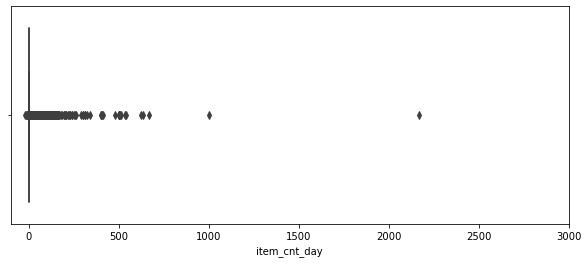

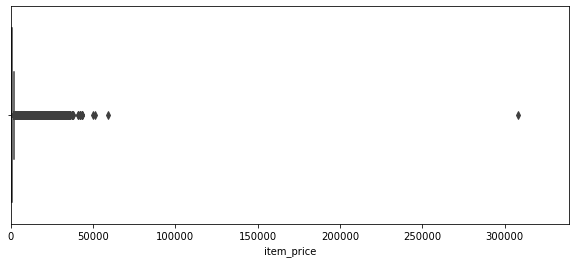

In [41]:

plt.figure(figsize=(10,4))
plt.xlim(-100,3000)
sns.boxplot(x=SALES_TRAIN_DATAFRAME.item_cnt_day)
plt.figure(figsize=(10,4))
plt.xlim(SALES_TRAIN_DATAFRAME.item_price.min(),SALES_TRAIN_DATAFRAME.item_price.max()*1.1)
sns.boxplot(x=SALES_TRAIN_DATAFRAME.item_price)

PREPARING THE TRAINING DATASET

In [39]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers

In [35]:
# X_DEEP_MODEL_TRAIN we will keep all columns execpt the last one 
X_DEEP_MODEL_TRAIN = np.expand_dims(DATASET.values[:,:-1],axis = 2)
# Y_DEEP_MODEL_TRAIN the last column is our label
Y_DEEP_MODEL_TRAIN = DATASET.values[:,-1:]

# for test we keep all the columns execpt the first one loaded to X_DEEP_MODEL_TEST
X_DEEP_MODEL_TEST = np.expand_dims(DATASET.values[:,1:],axis = 2)

# shape 
print(X_DEEP_MODEL_TRAIN.shape,Y_DEEP_MODEL_TRAIN.shape,X_DEEP_MODEL_TEST.shape)


(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [36]:
save_best = tf.keras.callbacks.ModelCheckpoint("Model.h5", monitor='val_loss',verbose=1, save_best_only=True)


BUILDING THE MODEL

In [46]:
def Main_Model():
    
    Model = tf.keras.models.Sequential()
    Model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), input_shape=(33, 1)))

    Model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    Model.add(tf.keras.layers.Dropout(0.2))

    Model.add(tf.keras.layers.Flatten())
    
    Model.add(tf.keras.layers.Dense(64, activation='relu', 
                                    kernel_initializer='uniform'))
    Model.add(tf.keras.layers.Dense(1))
    
    
    Model.compile(loss='binary_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])
    Model.summary()
    
    return Model

In [24]:
model = Main_Model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 33, 256)          133120    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 33, 128)          164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 33, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 4224)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                135200    
                                                                 
 dense_3 (Dense)             (None, 1)                

TRAIN THE MODEL BY FITTING THE SLICED DATA 

In [25]:
model.fit(X_DEEP_MODEL_TRAIN, 
          Y_DEEP_MODEL_TRAIN, 
          validation_split=0.2, 
          epochs=4, 
          batch_size=512, 
          verbose=1, 
          callbacks=[save_best])


Epoch 1/5
335/335 [==============================] - ETA: 0s - loss: 34.1826 - sparse_categorical_accuracy: 0.8575
Epoch 1: val_loss did not improve from 0.74355
335/335 [==============================] - 1122s 3s/step - loss: 34.1826 - sparse_categorical_accuracy: 0.8575 - val_loss: 0.8196 - val_sparse_categorical_accuracy: 0.9015
Epoch 2/5
335/335 [==============================] - ETA: 0s - loss: 33.7995 - sparse_categorical_accuracy: 0.8575
Epoch 2: val_loss did not improve from 0.74355
335/335 [==============================] - 1673s 5s/step - loss: 33.7995 - sparse_categorical_accuracy: 0.8575 - val_loss: 0.7812 - val_sparse_categorical_accuracy: 0.9015
Epoch 3/5
335/335 [==============================] - ETA: 0s - loss: 34.6058 - sparse_categorical_accuracy: 0.8575
Epoch 3: val_loss did not improve from 0.74355
335/335 [==============================] - 1453s 4s/step - loss: 34.6058 - sparse_categorical_accuracy: 0.8575 - val_loss: 0.7473 - val_sparse_categorical_accuracy: 0.901

EPOCHS: 5
BATCH SIZE: 512
VALIDATION SPLIT: 0.2
SPARSE CATEGORICAL ACCURACY: 90.15%


SAVE THE PREDICTED VALUES IN HDF5 FORMAT

In [20]:
# creating submission file   
model.save("result.H5")

6694/6694 [==============================] - 148s 22ms/step


In [57]:

prediction =model.predict(X_DEEP_MODEL_TEST)
np.savetxt("C:/Users/i tharun chand/Desktop/Data Analytics with R Programming/project/Predicted Result.csv", prediction,
              delimiter = ",")


6694/6694 [==============================] - 407s 61ms/step


In [61]:
print("Shape of Result Dataset: ", prediction.shape )

Shape of Result Dataset:  (214200, 1)
